In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.table import Table
from astropy.table import vstack as tab_vstack

from lvmdap.dap_tools import list_columns,read_DAP_file,map_plot_DAP,scatter
from matplotlib import use as mpl_use
#mpl_use('Agg')

%matplotlib inline
from matplotlib import rcParams as rc
rc.update({'font.size': 19,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 19,\
           'ytick.labelsize' : 19,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mpl_colors



In [13]:
t_DR20 = Table.read('tables/dr20_pointings_final.csv')
#t_DR20['dapfile'] = 'junk'
a_files = []
for t_now in t_DR20:
    expnum = f"{int(t_now['expnum']):08d}"
    file = f'dap-rsp108-sn20-{expnum}.dap.fits.gz'
    a_files.append(file)
t_DR20['dapfile'] = np.array(a_files)


In [24]:
t_DR20['NGCname']

NGC7293
NMGC598
NMGC598
NGC1976
NGC1976
NGC1976
NGC1976
NGC1976
NGC1976
NGC1976
NGC1976


In [ ]:
DIR_DAP = 'dap_v1.2.0/'

dap_files=t_DR20['dapfile'][0:10]
verbose=True
verbose=False
ra=[]
dec=[]
idn=[]
for I,dap_file in enumerate(dap_files):
    dap_file=f'{DIR_DAP}/{dap_file}'
    tab_DAP_tmp=read_DAP_file(dap_file,verbose=verbose)
    tab_DAP_tmp['NGCname'] = t_DR20['NGCname'][I]
    if (I==0):
        tab_DAP_DR20=tab_DAP_tmp
    else:
        tab_DAP_DR20=tab_vstack([tab_DAP,tab_DAP_tmp])
    verbose=False
    ra_now=np.nanmean(tab_DAP_tmp['ra'])
    dec_now=np.nanmean(tab_DAP_tmp['dec'])
    id_now=str(tab_DAP_tmp['id'][0])
    ra.append(ra_now)
    dec.append(dec_now)
    idn.append(id_now)
    print(I,dap_file,tab_DAP_tmp['ra'][0],tab_DAP_tmp['dec'][0],tab_DAP_tmp['id'][0],tab_DAP_tmp['NGCname'][0])

ra=np.array(ra)    
dec=np.array(dec)    
idn=np.array(idn)    


0 dap_v1.2.0//dap-rsp108-sn20-00003728.dap.fits.gz 337.47754731784653 -21.04825417258072 3728.10 NGC7293
1 dap_v1.2.0//dap-rsp108-sn20-00005511.dap.fits.gz 23.471126639785084 30.33785372147296 5511.10 NMGC598
2 dap_v1.2.0//dap-rsp108-sn20-00005512.dap.fits.gz 23.59168574343628 30.5184228435079 5512.10 NMGC598
3 dap_v1.2.0//dap-rsp108-sn20-00006374.dap.fits.gz 82.57189425798178 -4.421746056574206 6374.10 NGC1976
4 dap_v1.2.0//dap-rsp108-sn20-00007327.dap.fits.gz 82.84488548634974 -4.194017315439915 7327.10 NGC1976
5 dap_v1.2.0//dap-rsp108-sn20-00007336.dap.fits.gz 83.07074060658248 -3.838265162453383 7336.10 NGC1976
6 dap_v1.2.0//dap-rsp108-sn20-00007908.dap.fits.gz 81.9700340876643 -4.887655032541124 7908.10 NGC1976
7 dap_v1.2.0//dap-rsp108-sn20-00007912.dap.fits.gz 83.49252623759902 -3.8552486162707544 7912.10 NGC1976


In [ ]:
np.unique(tab_DAP_DR20['NGCname'])
NGCname = 'NGC1976'
tab_DAP = tab_DAP_DR20[tab_DAP_DR20['NGCname']==NGCname]

In [ ]:
def map_plot_DAP_rgb(tab_DAP,\
                     rgb_key=('flux_pe_6583.45','flux_pe_6562.85','flux_pe_5006.84'), \
                     rgb_scale=(1.0,1.0,1.0),\
                 vmin=0, vmax=0, titles=('r','g','b'), filename='junk',\
                fsize=5, figs_dir='.',fig_type='png',\
                 gamma=1.0, sf=1.0, tab_pt=None,fs=18):

    rc.update({'font.size': fs*fsize/5,\
               'font.weight': 900,\
               'text.usetex': True,\
               'path.simplify'           :   True,\
               'xtick.labelsize' : fs*fsize/5,\
               'ytick.labelsize' : fs*fsize/5,\
               'axes.linewidth'  : 2.0,\
               'xtick.major.size'        :   6,\
               'ytick.major.size'        :   6,\
               'xtick.minor.size'        :   3,\
               'ytick.minor.size'        :   3,\
               'xtick.major.width'       :   1,\
               'ytick.major.width'       :   1,\
               'lines.markeredgewidth'   :   1,\
               'legend.numpoints'        :   1,\
               'xtick.minor.width'       :   1,\
               'ytick.minor.width'       :   1,\
               'legend.frameon'          :   False,\
               'legend.handletextpad'    :   0.3,\
               'font.family'    :   'serif',\
               'mathtext.fontset'        :   'stix',\
               'axes.facecolor' : "w",\
               })
    
    X= tab_DAP['ra'].value
    Y= tab_DAP['dec'].value
    R=tab_DAP[rgb_key[2]].value  
    G=tab_DAP[rgb_key[1]].value    
    B=tab_DAP[rgb_key[0]].value 
    R = R * rgb_scale[2]
    G = G * rgb_scale[1]
    B = B * rgb_scale[0]
    RGB = np.stack((R, G, B), axis=1)
    if (vmin==vmax):
        vmin=np.nanmin(RGB)
        vmax=np.nanmax(RGB)
    print(f'min/max:{vmin}/{vmax}')
    r = (R-vmin)/(vmax-vmin)
    g = (G-vmin)/(vmax-vmin)
    b = (B-vmin)/(vmax-vmin)

    r[r>1]=1
    r[r<0]=0
    b[b>1]=1
    b[b<0]=0
    r[r>1]=1
    r[r<0]=0    
    
    r = np.ma.filled(r, fill_value=0.0)
    g = np.ma.filled(g, fill_value=0.0)
    b = np.ma.filled(b, fill_value=0.0)

    r=r**gamma
    g=g**gamma
    b=b**gamma
    
#    print (r)
    r = np.ma.compressed(r)
    g = np.ma.compressed(g)
    b = np.ma.compressed(b)   


    #print(r,g,b)
    colors = np.stack((r, g, b), axis=1)
    colors[colors>1]=1
    colors[colors<0]=0
#    print(colors)
    fig,ax = plt.subplots(1,1,figsize=(fsize,fsize*0.95))
#    norm=mpl_colors.PowerNorm(vmin=0,vmax=1,gamma=gamma)
    scatter(X, Y, ax, color=colors, size=sf*35.6/3600)#, color=colors)
    ax.set_xlabel('Ra [deg]')#,fontsize=21)
    ax.set_ylabel('Dec [deg]')#,fontsize=21)
    xx = ax.get_xlim()
    yy = ax.get_ylim()
    ax.set_xlim(xx[1],xx[0])
    ax.text(xx[1]-0.03*(xx[1]-xx[0]),yy[1]-0.06*(yy[1]-yy[0]),titles[0],fontsize=fs*(fsize/5),color='tomato')
    ax.text(xx[1]-0.03*(xx[1]-xx[0]),yy[1]-0.12*(yy[1]-yy[0]),titles[1],fontsize=fs*(fsize/5),color='forestgreen')
    ax.text(xx[1]-0.03*(xx[1]-xx[0]),yy[1]-0.18*(yy[1]-yy[0]),titles[2],fontsize=fs*(fsize/5),color='steelblue')

    if (tab_pt != None):
        for tap_pt_now in tab_pt:
            ax.text(tab_pt['ra'],tab_pt['dec'],tab_pt['id'])
#    ax.set_aspect('equal', adjustable='box')
    try:
        plt.show()
    except:
        plt_show=False
    fig.tight_layout()
    fig.savefig(f'{figs_dir}/{filename}.{fig_type}', facecolor='white')
    plt.close()
    return colors


In [ ]:
#from my_utils import search_col
def search_col(tab,key):
    a_cols=[]
    for cols in tab.columns:
        if (cols.find(key)>-1):
            print(cols)
            a_cols.append(cols)
    return np.array(a_cols)


search_col(tab_DAP,'pe_6583')

flux_pe_6583.45
e_flux_pe_6583.45
disp_pe_6583.45
e_disp_pe_6583.45
vel_pe_6583.45
e_vel_pe_6583.45
sigma_kms_pe_6583.45
X_sq_pe_6583.45
fr_pe_6583.45


array(['flux_pe_6583.45', 'e_flux_pe_6583.45', 'disp_pe_6583.45',
       'e_disp_pe_6583.45', 'vel_pe_6583.45', 'e_vel_pe_6583.45',
       'sigma_kms_pe_6583.45', 'X_sq_pe_6583.45', 'fr_pe_6583.45'],
      dtype='<U20')

min/max:-100.0/10000.0


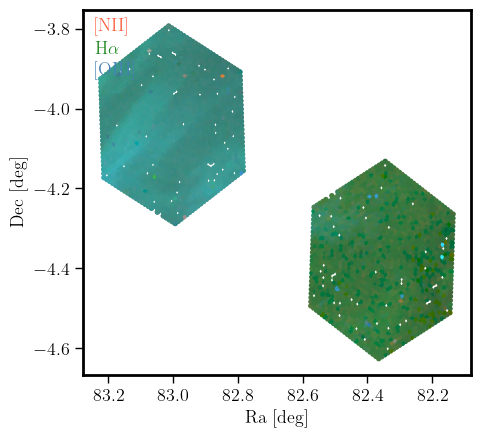

In [ ]:
# 637.416/110230.7468
#                  rgb_key=('flux_pe_6583.41','flux_pe_6562.68','flux_pe_5006.84'), \
# fsize=25
colors=map_plot_DAP_rgb(tab_DAP, \
                 rgb_key=('flux_pe_6583.45','flux_pe_6562.85','flux_pe_5006.84'), \
                 rgb_scale = (3,1,1.5), \
                 vmin=-100.0, vmax=10000.0,\
                 titles=('[NII]',r'H$\alpha$','[OIII]'), filename=f'{NGCname}_DAP_rgb',\
                 fsize=5, figs_dir='figs',gamma=0.35,fig_type='png',fs=13)

min/max:600.0/100000.0


/tmp/ipykernel_173643/2606146357.py:61: RuntimeWarning: invalid value encountered in power
  g=g**gamma


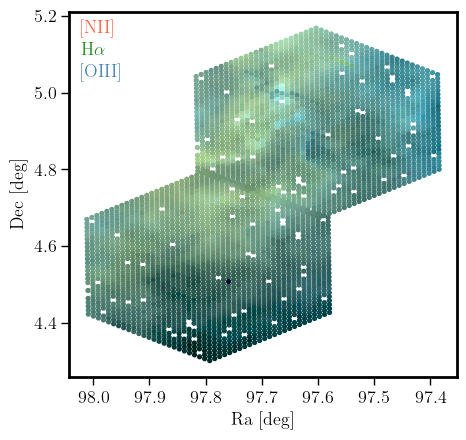

In [ ]:
colors=map_plot_DAP_rgb(tab_DAP, \
                 rgb_key=('flux_pek_6583.45','flux_pek_6562.85','flux_pek_5006.84'), \
                 rgb_scale = (3,1,1.5), \
                 vmin=600.0, vmax=100000.0,\
                 titles=('[NII]',r'H$\alpha$','[OIII]'), filename=f'{NGCname}_DAP_rgb_pek',\
                 fsize=5, figs_dir='figs',gamma=0.35,fig_type='png',fs=13)

(-1000.0, 1000.0)

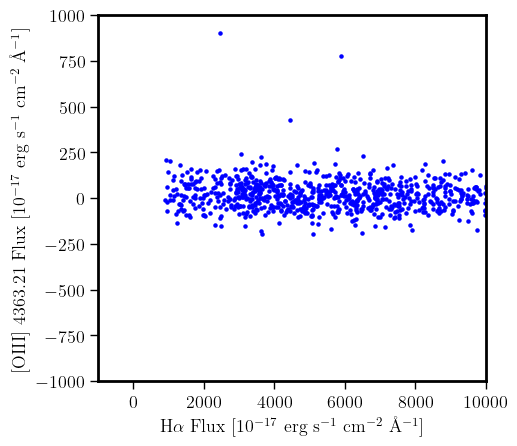

In [15]:
fig,ax = plt.subplots(1,1,figsize=(5,5*0.95))
ax.scatter(tab_DAP['flux_Halpha_6562.85'], tab_DAP['flux_[OIII]_4363.21'], c='blue', s=5)
ax.set_xlabel('H$\\alpha$ Flux [10$^{-17}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]')
ax.set_ylabel('[OIII] 4363.21 Flux [10$^{-17}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$]')
ax.set_xlim(-1000,10000)
ax.set_ylim(-1000,1000)
#ax.set_xscale('log')


In [9]:
search_col(tab_DAP,'[OIII]')

flux_[OIII]_4363.21
flux_[OIII]_4958.91
flux_[OIII]_5006.84
vel_[OIII]_4363.21
vel_[OIII]_4958.91
vel_[OIII]_5006.84
disp_[OIII]_4363.21
disp_[OIII]_4958.91
disp_[OIII]_5006.84
EW_[OIII]_4363.21
EW_[OIII]_4958.91
EW_[OIII]_5006.84
e_flux_[OIII]_4363.21
e_flux_[OIII]_4958.91
e_flux_[OIII]_5006.84
e_vel_[OIII]_4363.21
e_vel_[OIII]_4958.91
e_vel_[OIII]_5006.84
e_disp_[OIII]_4363.21
e_disp_[OIII]_4958.91
e_disp_[OIII]_5006.84
e_EW_[OIII]_4363.21
e_EW_[OIII]_4958.91
e_EW_[OIII]_5006.84
sigma_kms_[OIII]_4363.21
sigma_kms_[OIII]_4958.91
sigma_kms_[OIII]_5006.84
X_sq_[OIII]_4363.21
X_sq_[OIII]_4958.91
X_sq_[OIII]_5006.84


In [12]:
search_col(tab_DAP,'med_flux')

med_flux_st
e_med_flux_st


Text(0, 0.5, '[$\\alpha$/Fe]')

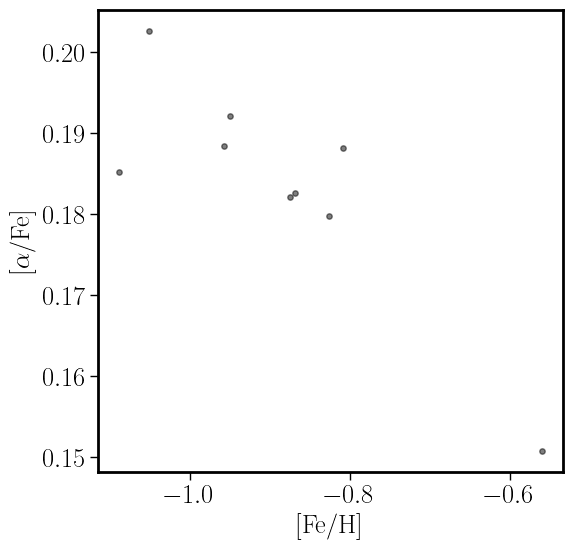

In [13]:
rc.update({'font.size': 19,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 19,\
           'ytick.labelsize' : 19,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


fig,ax = plt.subplots(1,1,figsize=(6,6))
mask_SN = tab_DAP['med_flux_st']/tab_DAP['e_med_flux_st'] > 30
#SN_cut = tab_DAP['sn_5500']>10
ax.scatter(tab_DAP['Fe'][mask_SN],tab_DAP['alpha'][mask_SN],s=15,c='k',alpha=0.5)
ax.set_xlabel('[Fe/H]')
ax.set_ylabel(r'[$\alpha$/Fe]')

Text(0, 0.5, '[$\\alpha$/Fe]')

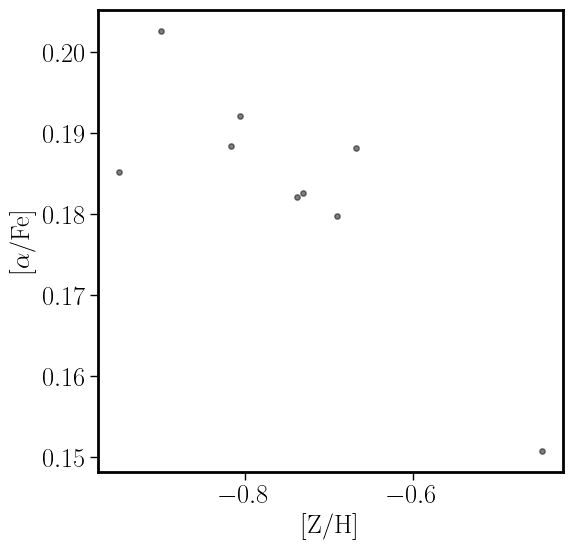

In [14]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
mask_SN = tab_DAP['med_flux_st']/tab_DAP['e_med_flux_st'] > 30
#SN_cut = tab_DAP['sn_5500']>10
ZH = tab_DAP['Fe'] + tab_DAP['alpha']*0.75
ax.scatter(ZH[mask_SN],tab_DAP['alpha'][mask_SN],s=15,c='k',alpha=0.5)
ax.set_xlabel('[Z/H]')
ax.set_ylabel(r'[$\alpha$/Fe]')

min/max:600.0/100000.0


/tmp/ipykernel_23687/2606146357.py:61: RuntimeWarning: invalid value encountered in power
  g=g**gamma


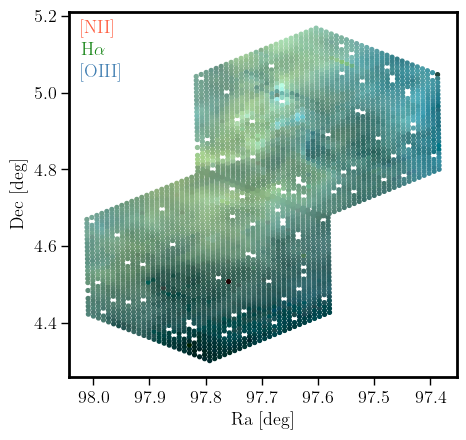

In [16]:
# 637.416/110230.7468
colors=map_plot_DAP_rgb(tab_DAP, \
                 rgb_key=('flux_[NII]_6583.45','flux_Halpha_6562.85','flux_[OIII]_5006.84'), \
                 rgb_scale = (3,1,1.5), \
                 vmin=600.0, vmax=100000.0,\
                 titles=('[NII]',r'H$\alpha$','[OIII]'), filename='Rosetta_NP',\
                 fsize=5, figs_dir='figs',gamma=0.35,fig_type='png',fs=13)

min/max:600.0/100000.0


/tmp/ipykernel_23687/2606146357.py:61: RuntimeWarning: invalid value encountered in power
  g=g**gamma


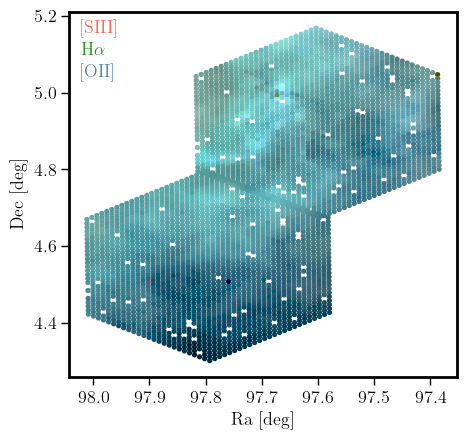

In [17]:
# 637.416/110230.7468
colors=map_plot_DAP_rgb(tab_DAP, \
                 rgb_key=('flux_[SIII]_9531.1','flux_Halpha_6562.85','flux_[OII]_3728.82'), \
                 rgb_scale = (3,1,1.5), \
                 vmin=600.0, vmax=100000.0,\
                 titles=('[SIII]',r'H$\alpha$','[OII]'), filename='Rosetta_NP_test',\
                 fsize=5, figs_dir='figs',gamma=0.35,fig_type='png',fs=13)

In [ ]:
ax.

In [18]:
search_col(tab_DAP,'flux_[OII]')

flux_[OII]_3726.03
flux_[OII]_3728.82
e_flux_[OII]_3726.03
e_flux_[OII]_3728.82
flux_[OII]_7318.92
flux_[OII]_7329.66
e_flux_[OII]_7318.92
e_flux_[OII]_7329.66


In [28]:
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


mask_Ha = (tab_DAP['flux_Halpha_6562.85']>100) & (tab_DAP['flux_Halpha_6562.85']>50.0*tab_DAP['e_flux_Halpha_6562.85'])



Ha=tab_DAP['flux_Halpha_6562.85']
Hb=tab_DAP['flux_Hbeta_4861.36']
OIII=tab_DAP['flux_[OIII]_5006.84']
NII=tab_DAP['flux_[NII]_6583.45']
SII=tab_DAP['flux_[SII]_6716.44']+tab_DAP['flux_[SII]_6730.82']
#OI=tab_DAP['flux_[OI]_6300.3']
OI=tab_DAP['flux_pek_6300.3']
#tab_DAP['flux_pe_3726.03']+tab_DAP['flux_pe_3728.82']

map_dist=np.arange(len(Ha))

eHa=tab_DAP['e_flux_pe_6562.85']
eHb=tab_DAP['e_flux_pe_4861.36']
eOIII=tab_DAP['e_flux_pe_5006.84']
eNII=tab_DAP['e_flux_pe_6583.45']
eSII=np.sqrt(tab_DAP['e_flux_pe_6716.44']**2+tab_DAP['e_flux_pe_6730.82']**2)
eOI=tab_DAP['flux_pe_9531.1']
#tab_DAP['e_flux_pe_3726.03']+tab_DAP['e_flux_pe_3728.82']

#tab_DAP['e_flux_pe_9531.1']

O3=np.log10(OIII)-np.log10(Hb)
N2=np.log10(NII)-np.log10(Ha)
S2=np.log10(SII/Ha)
O1=np.log10(OI/Ha)
lEW_Ha = np.log10(np.abs(tab_DAP['EW_Halpha_6562.85']))
e_lEW_Ha = 0.4*np.abs(tab_DAP['e_EW_Halpha_6562.85']/tab_DAP['EW_Halpha_6562.85'])
nx = 2.5 #np.max(tab_DAP[mask_Ha]['R_Re'])
#
#
#
fig, axes = plt.subplots(1,3,figsize=(15.5,6), sharey=True, squeeze=False)
x_min1=-1.19
x_max1=0.39
y_min1=-2.49
y_max1=1.29

x=np.linspace(5*x_min1,2*x_max1,100)
cut_y=-0.7+0.2-3.67*x
cut_y2=-1.7+0.5-3.67*x
cut_y3=0.61/(x-0.05)+1.3
cut_y4=0.61/(x-0.47)+1.19
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII_AGNs=1.89*(x)+0.76;
cut_y_OI=0.73/((x+0.59))+1.33;#+1.10;
cut_y_OI_AGNs=1.18*(x)+1.30;
cut_y_OIII_AGNs=1.14*(x)+0.36;
cm = plt.cm.get_cmap('viridis')
cax1=axes[0,0].scatter(N2[mask_Ha],O3[mask_Ha],color=colors[mask_Ha],edgecolor='None',s=10)
#                       c=map_dist[mask_Ha], marker='o', s=30, alpha=0.35, cmap=cm, vmin=0, vmax=nx)
cax2=axes[0,1].scatter(S2[mask_Ha],O3[mask_Ha],color=colors[mask_Ha],edgecolor='None',s=10)
cax3=axes[0,2].scatter(O1[mask_Ha],O3[mask_Ha],color=colors[mask_Ha],edgecolor='None',s=10)

#axes[0,0].scatter(N2,O3,alpha=0.75, marker='*', s=100,c='green')
#axes[0,1].scatter(S2,O3,alpha=0.75, marker='*', s=100,c='green')
#axes[0,2].scatter(O1,O3,alpha=0.75, marker='*', s=100,c='green')

axes[0,0].plot(x[x<0],cut_y3[x<0],'r-.')
axes[0,0].plot(x,cut_y4,'b-')
axes[0,1].plot(x[x<0.2],cut_y_SII[x<0.2],'b-')
axes[0,2].plot(x[x<-0.6],cut_y_OI[x<-0.6],'b-')


#plt.rcParams.update({'font.size': 16})
axes[0,0].set_ylabel(r'log([Oiii]/H$\beta$)')
axes[0,0].set_xlabel(r'log([Nii]/H$\alpha$)')
axes[0,1].set_xlabel(r'log([Sii]/H$\alpha$)')
axes[0,2].set_xlabel(r'log([Oi]/H$\alpha$)')
axes[0,0].set_xlim(x_min1,x_max1)
axes[0,1].set_xlim(x_min1-0.3,x_max1)
axes[0,2].set_xlim(x_min1-3.9,x_max1+0.1)
axes[0,0].set_ylim(y_min1,y_max1)




plt.subplots_adjust(wspace=0)

plt.tight_layout
fig.savefig(f'figs/BPT_Rosetta.png', facecolor='white')
plt.close()

#cax1=axes[0,2].scatter(N2[mask_Ha],O3[mask_Ha],c=log_EW_Ha[mask_Ha], marker='o', s=30, alpha=0.35, cmap=cm, vmin=-3, vmax=2.5)
#axes[0,2].plot(x[x<0],cut_y3[x<0],'r-.')
#axes[0,2].plot(x,cut_y4,'b-')
#cb1=add_colorbar(cax1)
#cb1.set_label(r'$log|EW(H\alpha)|$')

/tmp/ipykernel_23687/2975855257.py:55: RuntimeWarning: invalid value encountered in log10
  O3=np.log10(OIII)-np.log10(Hb)
/tmp/ipykernel_23687/2975855257.py:56: RuntimeWarning: invalid value encountered in log10
  N2=np.log10(NII)-np.log10(Ha)
/tmp/ipykernel_23687/2975855257.py:57: RuntimeWarning: invalid value encountered in log10
  S2=np.log10(SII/Ha)
/tmp/ipykernel_23687/2975855257.py:58: RuntimeWarning: invalid value encountered in log10
  O1=np.log10(OI/Ha)
/tmp/ipykernel_23687/2975855257.py:59: RuntimeWarning: divide by zero encountered in log10
  lEW_Ha = np.log10(np.abs(tab_DAP['EW_Halpha_6562.85']))
/tmp/ipykernel_23687/2975855257.py:60: RuntimeWarning: divide by zero encountered in divide
  e_lEW_Ha = 0.4*np.abs(tab_DAP['e_EW_Halpha_6562.85']/tab_DAP['EW_Halpha_6562.85'])
/tmp/ipykernel_23687/2975855257.py:82: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` o

In [27]:
O1[~np.isnan(O1)]

-4.336612454097772
-4.254827309700913
-4.333023682046926
-4.07096006984071
-4.21037222532732
-3.962284914235154
-2.866776441151359
-4.003833611822772
-4.068578880801962
-4.341756533465336
-4.257820194722287


In [21]:
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


mask_Ha = (tab_DAP['flux_pe_6562.68']>80) & (tab_DAP['flux_pe_6562.68']>3.0*tab_DAP['e_flux_pe_6562.68'])



Ha=tab_DAP['flux_pe_6562.85']
Hb=tab_DAP['flux_pe_4861.36']
OIII=tab_DAP['flux_pe_5006.84']
NII=tab_DAP['flux_pe_6583.41']
SII=tab_DAP['flux_pe_6716.44']+tab_DAP['flux_pe_6730.82']
OI=tab_DAP['flux_pe_9531.1']
#tab_DAP['flux_pe_3726.03']+tab_DAP['flux_pe_3728.82']

map_dist=np.arange(len(Ha))

eHa=tab_DAP['e_flux_pe_6562.85']
eHb=tab_DAP['e_flux_pe_4861.36']
eOIII=tab_DAP['e_flux_pe_5006.84']
eNII=tab_DAP['e_flux_pe_6583.41']
eSII=np.sqrt(tab_DAP['e_flux_pe_6716.44']**2+tab_DAP['e_flux_pe_6730.82']**2)
eOI=tab_DAP['flux_pe_9531.1']
#tab_DAP['e_flux_pe_3726.03']+tab_DAP['e_flux_pe_3728.82']

#tab_DAP['e_flux_pe_9531.1']

O3=np.log10(OIII)-np.log10(Hb)
N2=np.log10(NII)-np.log10(Ha)
S2=np.log10(SII/Ha)
O1=np.log10(OI/Ha)
lEW_Ha = np.log10(np.abs(tab_DAP['EW_Halpha_6562.85']))
e_lEW_Ha = 0.4*np.abs(tab_DAP['e_EW_Halpha_6562.85']/tab_DAP['EW_Halpha_6562.85'])
nx = 2.5 #np.max(tab_DAP[mask_Ha]['R_Re'])
#
#
#
fig, axes = plt.subplots(1,3,figsize=(9.5,4.3), sharey=True, squeeze=False)
x_min1=-1.39
x_max1=0.39
y_min1=-1.19
y_max1=1.19

x=np.linspace(2*x_min1,2*x_max1,100)
cut_y=-0.7+0.2-3.67*x
cut_y2=-1.7+0.5-3.67*x
cut_y3=0.61/(x-0.05)+1.3
cut_y4=0.61/(x-0.47)+1.19
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII_AGNs=1.89*(x)+0.76;
cut_y_OI=0.73/((x+0.59))+1.33;#+1.10;
cut_y_OI_AGNs=1.18*(x)+1.30;
cut_y_OIII_AGNs=1.14*(x)+0.36;
cm = plt.cm.get_cmap('viridis')
cax1=axes[0,0].scatter(N2[mask_Ha],O3[mask_Ha],color=colors[mask_Ha])
#                       c=map_dist[mask_Ha], marker='o', s=30, alpha=0.35, cmap=cm, vmin=0, vmax=nx)
cax2=axes[0,1].scatter(S2[mask_Ha],O3[mask_Ha],color=colors[mask_Ha])
cax3=axes[0,2].scatter(O1[mask_Ha],O3[mask_Ha],color=colors[mask_Ha])

#axes[0,0].scatter(N2,O3,alpha=0.75, marker='*', s=100,c='green')
#axes[0,1].scatter(S2,O3,alpha=0.75, marker='*', s=100,c='green')
#axes[0,2].scatter(O1,O3,alpha=0.75, marker='*', s=100,c='green')

axes[0,0].plot(x[x<0],cut_y3[x<0],'r-.')
axes[0,0].plot(x,cut_y4,'b-')
axes[0,1].plot(x[x<0.1],cut_y_SII[x<0.1],'b-')
#axes[0,2].plot(x[x<-0.6],cut_y_OI[x<-0.6],'b-')


#plt.rcParams.update({'font.size': 16})
axes[0,0].set_ylabel(r'log([Oiii]/H$\beta$)')
axes[0,0].set_xlabel(r'log([Nii]/H$\alpha$)')
axes[0,1].set_xlabel(r'log([Sii]/H$\alpha$)')
axes[0,2].set_xlabel(r'log([Siii]/H$\alpha$)')
axes[0,0].set_xlim(x_min1,x_max1)
axes[0,1].set_xlim(x_min1,x_max1)
axes[0,2].set_xlim(x_min1-1.1,x_max1-0.2)
axes[0,0].set_ylim(y_min1,y_max1)




plt.subplots_adjust(wspace=0)

plt.tight_layout
#cax1=axes[0,2].scatter(N2[mask_Ha],O3[mask_Ha],c=log_EW_Ha[mask_Ha], marker='o', s=30, alpha=0.35, cmap=cm, vmin=-3, vmax=2.5)
#axes[0,2].plot(x[x<0],cut_y3[x<0],'r-.')
#axes[0,2].plot(x,cut_y4,'b-')
#cb1=add_colorbar(cax1)
#cb1.set_label(r'$log|EW(H\alpha)|$')

KeyError: 'flux_pe_6562.68'

In [172]:
#DIR_DAP = '/disk-a/sanchez/LVM/LVM/ver_231113/output_dap/'
#dap_file='dap-nsp-00006109.dap.fits.gz'
#'dap-rsp30-00006109.dap.fits.gz'
#dap_file='dap-rsp30-00006690.dap.fits.gz'

#DIR_DAP = 'output_dap'
#dap-test-SN50-00006109.dap.fits.gz
#dap_file='dap-test-SN50-00006109.dap.fits.gz'
#'dap-rsp30-00006109.dap.fits.gz'
#dap-test-00006109.dap.fits.gz'

#DIR_DAP = 'output_chiripa'
#dap_file='dap-rsp30-SN50-00006109.dap.fits.gz'
#dap_file='dap-rsp30-00006709.dap.fits.gz'

# Download the files from here!
# http://ifs.astroscu.unam.mx/LVM/LVMDAP/v0.231130/

# Store them in the director DIR_DAP, like below


#DIR_DAP = 'output_ofelia'
#DIR_DAP = 'output_ofelia_new'
DIR_DAP = 'output_atocatl/'
#dap_files=['dap-rsp30-sn20-00006109.dap.fits.gz',
#           'dap-rsp30-sn20-00006110.dap.fits.gz',
#           'dap-rsp30-sn20-00006111.dap.fits.gz',
#           'dap-rsp30-sn20-00006112.dap.fits.gz',
#           'dap-rsp30-sn20-00006113.dap.fits.gz',
#           'dap-rsp30-sn20-00006114.dap.fits.gz',
#           'dap-rsp30-sn20-00006115.dap.fits.gz',
#           'dap-rsp30-sn20-00005684.dap.fits.gz',                                         
#           'dap-rsp30-sn20-00005685.dap.fits.gz',                                                      
#           'dap-rsp30-sn20-00006047.dap.fits.gz',                                                      
#           'dap-rsp30-sn20-00006048.dap.fits.gz',
#           'dap-rsp30-sn20-00006116.dap.fits.gz',
#           'dap-rsp30-sn20-00006117.dap.fits.gz',
#           'dap-rsp30-sn20-00006445.dap.fits.gz',
#           'dap-rsp30-sn20-00006446.dap.fits.gz',                                         
#           'dap-rsp30-sn20-00006447.dap.fits.gz',
#          'dap-rsp30-sn20-00006448.dap.fits.gz']

#'dap-rsp30-sn20-00005684.dap.fits.gz',
#'dap-rsp30-sn20-00005685.dap.fits.gz',
#'dap-rsp30-sn20-00006047.dap.fits.gz',
#'dap-rsp30-sn20-00006048.dap.fits.gz',

dap_files=['dap-rsp108-sn20-00006109.dap.fits.gz',
'dap-rsp108-sn20-00006110.dap.fits.gz',
'dap-rsp108-sn20-00006111.dap.fits.gz',
'dap-rsp108-sn20-00006112.dap.fits.gz']

#'dap-rsp30-sn20-00006113.dap.fits.gz',
#'dap-rsp30-sn20-00006114.dap.fits.gz',
#'dap-rsp30-sn20-00006115.dap.fits.gz',
#'dap-rsp30-sn20-00006116.dap.fits.gz',
#'dap-rsp30-sn20-00006117.dap.fits.gz',
#'dap-rsp30-sn20-00006445.dap.fits.gz',
#'dap-rsp30-sn20-00006446.dap.fits.gz',
#'dap-rsp30-sn20-00006447.dap.fits.gz',
#'dap-rsp30-sn20-00006448.dap.fits.gz',
#'dap-rsp30-sn20-00006449.dap.fits.gz',
#'dap-rsp30-sn20-00006450.dap.fits.gz',
#'dap-rsp30-sn20-00006634.dap.fits.gz',
#'dap-rsp30-sn20-00006635.dap.fits.gz',
#'dap-rsp30-sn20-00006636.dap.fits.gz',
#'dap-rsp30-sn20-00006637.dap.fits.gz',
#'dap-rsp30-sn20-00006638.dap.fits.gz',
#'dap-rsp30-sn20-00006639.dap.fits.gz']


#dap_files=['dap-rsp30-sn5-00006701.dap.fits.gz',\
#           'dap-rsp30-sn5-00006702.dap.fits.gz',\
#           'dap-rsp30-sn5-00006703.dap.fits.gz',\
#           'dap-rsp30-sn5-00006704.dap.fits.gz',\
#           'dap-rsp30-sn5-00006708.dap.fits.gz',\
#           'dap-rsp30-sn5-00006709.dap.fits.gz']

#DIR_DAP = 'output_chiripa'
#dap_files=['dap-rsp30-00006690.dap.fits.gz','dap-rsp30-00006691.dap.fits.gz','dap-rsp30-00006692.dap.fits.gz']
#dap_files=['dap-rsp30-00006112.dap.fits.gz','dap-rsp30-00006111.dap.fits.gz','dap-rsp30-SN50-00006109.dap.fits.gz']
verbose=True
verbose=False
ra=[]
dec=[]
idn=[]
for I,dap_file in enumerate(dap_files):
    dap_file=f'{DIR_DAP}/{dap_file}'
    tab_DAP_tmp=read_DAP_file(dap_file,verbose=verbose)
    if (I==0):
        tab_DAP=tab_DAP_tmp
    else:
        tab_DAP=tab_vstack([tab_DAP,tab_DAP_tmp])
    verbose=False
    ra_now=np.nanmean(tab_DAP_tmp['ra'])
    dec_now=np.nanmean(tab_DAP_tmp['dec'])
    id_now=str(tab_DAP_tmp['id'][0])
    ra.append(ra_now)
    dec.append(dec_now)
    idn.append(id_now)
    print(I,dap_file,tab_DAP_tmp['ra'][0],tab_DAP_tmp['dec'][0],tab_DAP_tmp['id'][0])

ra=np.array(ra)    
dec=np.array(dec)    
idn=np.array(idn)    

#dap_file='dap-rsp30-sn5-00006701.dap.fits.gz'
#dap_file='dap-rsp30-sn5-00006702.dap.fits.gz'
#dap_file='dap-rsp30-sn5-00006703.dap.fits.gz'
#dap_file='dap-rsp30-sn5-00006704.dap.fits.gz'
#dap_file='dap-rsp30-sn5-00006708.dap.fits.gz'
#dap_file='dap-rsp30-sn5-00006709.dap.fits.gz'

#dap_file='dap-rsp30-sn5-00006708.dap.fits.gz'
#dap_file='dap-rsp30-sn5-00006709.dap.fits.gz'

#tab_DAP_0=read_DAP_file('output_ofelia/dap-rsp30-sn5-00006701.dap.fits.gz',verbose=verbose)
#tab_DAP_1=read_DAP_file('output_ofelia/dap-rsp30-sn5-00006709.dap.fits.gz',verbose=verbose)

0 output_atocatl//dap-rsp108-sn20-00006109.dap.fits.gz 97.66300971713306 4.7103637711339665 6109.10
1 output_atocatl//dap-rsp108-sn20-00006110.dap.fits.gz 97.85784589660625 4.337067771133967 6110.10
2 output_atocatl//dap-rsp108-sn20-00006111.dap.fits.gz 97.8903353906415 5.0654177711339665 6111.10
3 output_atocatl//dap-rsp108-sn20-00006112.dap.fits.gz 98.08524798941808 4.691990771133966 6112.10


In [5]:
#print(ra,dec,idn)
idp=[]
for idns in idn:
    idp.append(idns.split('.')[0])
idp=np.array(idp)
#print(idp)
tab_pt=Table()
tab_pt['id']=idp
tab_pt['ra']=ra
tab_pt['dec']=dec
tab_pt

#tab_DAP_0=read_DAP_file('output_chiripa/dap-rsp30-00006690.dap.fits.gz',verbose=verbose)
#tab_DAP_1=read_DAP_file('output_chiripa/dap-rsp30-00006691.dap.fits.gz',verbose=verbose)

id,ra,dec
str4,float64,float64
6109,97.60057111157647,4.922440045146079
6110,97.79544097664143,4.549144045146079
6111,97.82786224991473,5.277494045146079
6112,98.02281110468336,4.904067045146078


In [6]:
#print(len(tab_DAP))
#plt.scatter(tab_DAP['ra'],tab_DAP['dec'],s=2)
#fig,ax = plt.subplots(1,1,figsize=(5,5))
#ax.scatter(tab_DAP_0['flux_Halpha_6562.85'],tab_DAP_1['flux_Halpha_6562.85'])
#ax.set_xlabel(r'H$\alpha$ flux 6690')
#ax.set_ylabel(r'H$\alpha$ flux 6691')
#ax.set_aspect('equal', adjustable='box')
#ax.set_xlim(-100,500)
#ax.set_ylim(-100,500)

#plt.show()



(-500.0, 100.0)

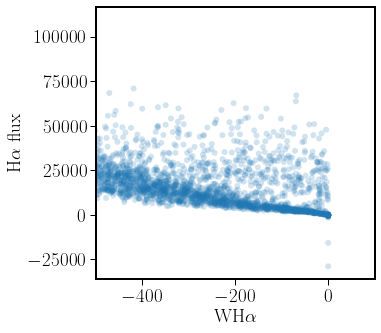

In [7]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(tab_DAP['EW_Halpha_6562.85'],tab_DAP['flux_Halpha_6562.85'],\
           alpha=0.2,edgecolor='None')
ax.set_ylabel(r'H$\alpha$ flux')
ax.set_xlabel(r'WH$\alpha$')
ax.set_xlim(-500,100)
#ax.set_aspect('equal', adjustable='box')
#plt.show()

<ipython-input-8-a2a25b919ed7>:2: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(np.abs(tab_DAP['EW_Halpha_6562.85'])),\
<ipython-input-8-a2a25b919ed7>:3: RuntimeWarning: invalid value encountered in log10
  np.log10(tab_DAP['flux_Halpha_6562.85']),\


(1.0, 5.0)

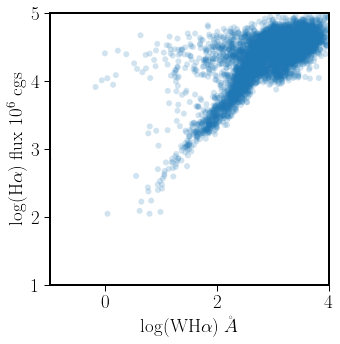

In [8]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(np.log10(np.abs(tab_DAP['EW_Halpha_6562.85'])),\
           np.log10(tab_DAP['flux_Halpha_6562.85']),\
           alpha=0.2,edgecolor='None')
ax.set_ylabel(r'log(H$\alpha$) flux 10$^6$ cgs')
ax.set_xlabel(r'log(WH$\alpha$) $\AA$')
ax.set_xlim(-1,4)
ax.set_ylim(1,5)

(-1000.0, 100000.0)

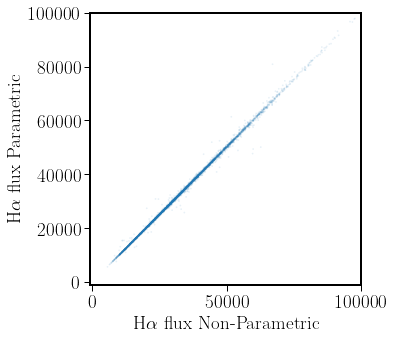

In [10]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(tab_DAP['flux_Halpha_6562.85'],tab_DAP['flux_pe_6562.85'],\
           alpha=0.1,s=3,edgecolor='None')
ax.set_xlabel(r'H$\alpha$ flux Non-Parametric')
ax.set_ylabel(r'H$\alpha$ flux Parametric')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1e3,1e5)
ax.set_ylim(-1e3,1e5)

#plt.show()
#tab_DAP['flux_Halpha_6562.85','flux_pe_6562.68']

In [11]:
class scatter():
    def __init__(self,x,y,ax,size=1,**kwargs):
        self.n = len(x)
        self.ax = ax
        self.ax.figure.canvas.draw()
        self.size_data=size
        self.size = size
        self.sc = ax.scatter(x,y,s=self.size,**kwargs)
        self._resize()
        self.cid = ax.figure.canvas.mpl_connect('draw_event', self._resize)

    def _resize(self,event=None):
        ppd=72./self.ax.figure.dpi
        trans = self.ax.transData.transform
        s =  ((trans((1,self.size_data))-trans((0,0)))*ppd)[1]
        if s != self.size:
            self.sc.set_sizes(s**2*np.ones(self.n))
            self.size = s
            self._redraw_later()

    def _redraw_later(self):
        self.timer = self.ax.figure.canvas.new_timer(interval=10)
        self.timer.single_shot = True
        self.timer.add_callback(lambda : self.ax.figure.canvas.draw_idle())
        self.timer.start()
        
def search_col(tab,key):
    for keys in tab.columns:
        if (keys.find(key)>-1):
            print(keys)

In [12]:
def map_plot_DAP(tab_DAP,line='flux_Halpha_6562.85', \
                 vmin=0, vmax=0, title=None, filename='junk',\
                 cmap='Spectral', fsize=5, figs_dir='.',fig_type='png',\
                 gamma=1.0, sf=1.0,tab_pt=False):

    rc.update({'font.size': 19,\
               'font.weight': 900,\
               'text.usetex': True,\
               'path.simplify'           :   True,\
               'xtick.labelsize' : 19,\
               'ytick.labelsize' : 19,\
               'axes.linewidth'  : 2.0,\
               'xtick.major.size'        :   6,\
               'ytick.major.size'        :   6,\
               'xtick.minor.size'        :   3,\
               'ytick.minor.size'        :   3,\
               'xtick.major.width'       :   1,\
               'ytick.major.width'       :   1,\
               'lines.markeredgewidth'   :   1,\
               'legend.numpoints'        :   1,\
               'xtick.minor.width'       :   1,\
               'ytick.minor.width'       :   1,\
               'legend.frameon'          :   False,\
               'legend.handletextpad'    :   0.3,\
               'font.family'    :   'serif',\
               'mathtext.fontset'        :   'stix',\
               'axes.facecolor' : "w",\
               })
    
    X=tab_DAP['ra']
    Y=tab_DAP['dec']
    C=tab_DAP[line]    
    if (title== None):
        title=line.replace("_"," ")
        title=line.replace("_"," ")
    if (vmin==vmax):
        vmin=np.nanmin(C)
        vmax=np.nanmax(C)
    print(line,vmin,vmax)
    fig,ax = plt.subplots(1,1,figsize=(fsize,fsize))
    norm=mpl_colors.PowerNorm(vmin=vmin,vmax=vmax,gamma=gamma)
    scat=scatter(X, Y, ax, size=sf*35.6/3600, c=C, cmap=cmap, norm=norm)
#    scat=scatter(X, Y, ax, size=35.6/3600, c=C,vmin = vmin, vmax = vmax, cmap=cmap, norm=colors.PowerNorm(gamma=gamma))
    ax.set_xlabel('Ra [deg]')#,fontsize=21)
    ax.set_ylabel('Dec [deg]')#,fontsize=21)
    xx = ax.get_xlim()
    ax.set_xlim(xx[1],xx[0])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(scat.sc, cax=cax,label=fr'{title}')#,fontsize=21)
    try:
        for tab_pt_now in tab_pt:
            ax.text(tab_pt_now['ra'],tab_pt_now['dec'],tab_pt_now['id'],fontsize=17)
    except:
        tab_pt=False
#    ax.set_aspect('equal', adjustable='box')
    try:
        plt.show()
    except:
        plt_show=False
    fig.tight_layout()
    fig.savefig(f'{figs_dir}/{filename}.{fig_type}')
    plt.close()

In [13]:
search_col(tab_DAP,'flux_Hb')
search_col(tab_DAP,'flux_pe_486')


flux_Hbeta_4861.36
e_flux_Hbeta_4861.36
flux_pe_4861.36
e_flux_pe_4861.36


flux_pe_4861.36 -200 100000.0


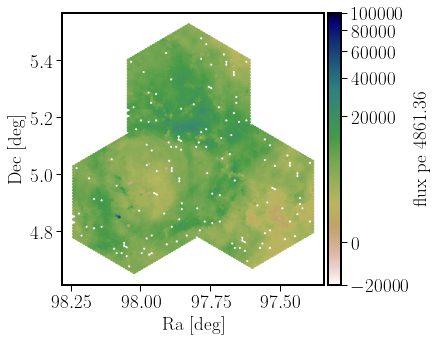

In [15]:
map_plot_DAP(tab_DAP,line='flux_pe_4861.36', \
                 vmin=-200, vmax=1e5, title=None, filename='junk',\
             cmap='gist_earth_r', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')#,tab_pt=tab_pt)

flux_pe_6562.85 -200 100000.0


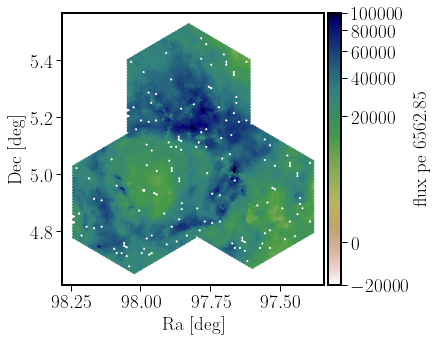

In [16]:
map_plot_DAP(tab_DAP,line='flux_pe_6562.85', \
                 vmin=-200, vmax=1e5, title=None, filename='junk',\
             cmap='gist_earth_r', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')#,tab_pt=tab_pt)

In [21]:
try:
    tab_DAP.add_column(tab_DAP['flux_pe_6562.85']/tab_DAP['flux_pe_4861.36'],name='HaHb')
except:
    print('HaHb not needed')
try:
    tab_DAP.add_column(tab_DAP['flux_Halpha_6562.85']/tab_DAP['flux_Hbeta_4861.36'],name='HaHb_fit')
except:
    print('HaHb not needed')

HaHb not needed
HaHb not needed


flux_pe_6562.85 -200 100000.0


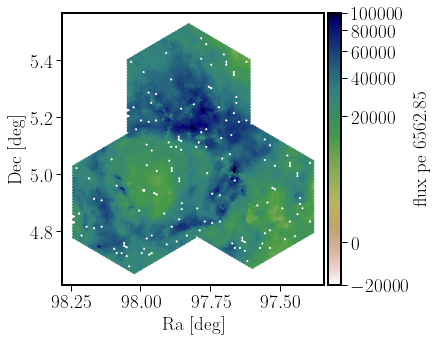

In [22]:
map_plot_DAP(tab_DAP,line='flux_pe_6562.85', \
                 vmin=-200, vmax=1e5, title=None, filename='junk',\
             cmap='gist_earth_r', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')#,tab_pt=tab_pt)

HaHb_fit 2.5 15


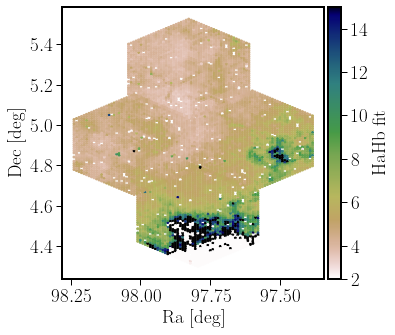

In [23]:
map_plot_DAP(tab_DAP,line='HaHb_fit', \
                 vmin=2.5, vmax=15, title=None, filename='junk',\
             cmap='gist_earth_r', fsize=5, figs_dir='figs',gamma=1.0,fig_type='pdf')#,tab_pt=tab_pt)

HaHb 2.5 15


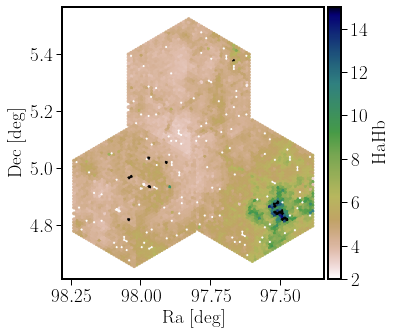

In [24]:
map_plot_DAP(tab_DAP,line='HaHb', \
                 vmin=2.5, vmax=15, title=None, filename='junk',\
             cmap='gist_earth_r', fsize=5, figs_dir='figs',gamma=1.0,fig_type='pdf')#,tab_pt=tab_pt)

flux_pe_6562.85 -200 100000.0


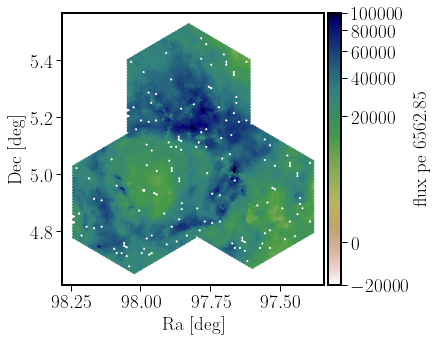

In [25]:
map_plot_DAP(tab_DAP,line='flux_pe_6562.85', \
                 vmin=-200, vmax=1e5, title=None, filename='junk',\
             cmap='gist_earth_r', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')#,tab_pt=tab_pt)

flux_Halpha_6562.85 -200 100000.0


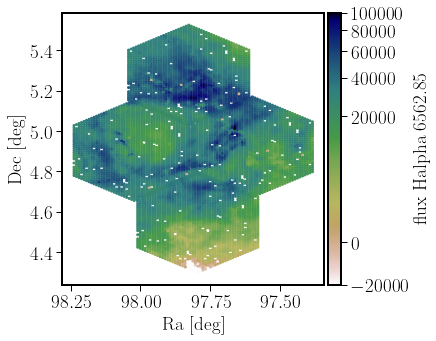

In [26]:
map_plot_DAP(tab_DAP,line='flux_Halpha_6562.85', \
                 vmin=-200, vmax=1e5, title=None, filename='junk',\
             cmap='gist_earth_r', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')

flux_Hbeta_4861.36 -200 100000.0


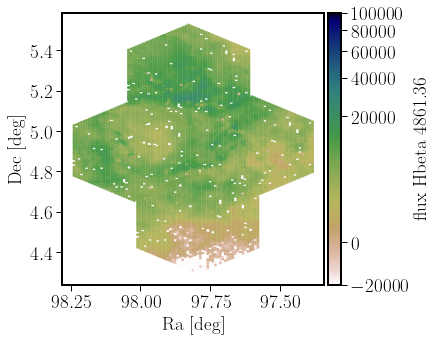

In [27]:
map_plot_DAP(tab_DAP,line='flux_Hbeta_4861.36', \
                 vmin=-200, vmax=1e5, title=None, filename='junk',\
             cmap='gist_earth_r', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')

(-0.5, 25.0)

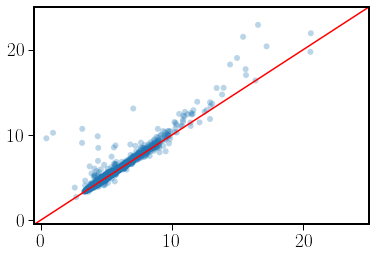

In [28]:
mask_flux = tab_DAP['flux_Hbeta_4861.36']>-1
plt.scatter(tab_DAP['HaHb'][mask_flux],tab_DAP['HaHb_fit'][mask_flux],alpha=0.3,edgecolor='None')
plt.plot([-0.5,25],[-0.5,25],c='red')
plt.xlim(-0.5,25)
plt.ylim(-0.5,25)


flux_[SIII]_6312.06 -200 500


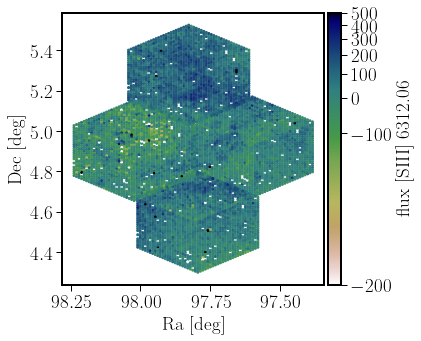

In [30]:
map_plot_DAP(tab_DAP,line='flux_[SIII]_6312.06', \
                 vmin=-200, vmax=500, title=None, filename='junk',\
             cmap='gist_earth_r', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')
#0 otput_chiripa/dap-rsp30-00006112.dap.fits.gz 98.08524798941808 4.691990771133966
#1 output_chiripa/dap-rsp30-00006111.dap.fits.gz 97.8903353906415 5.0654177711339665
#2 output_chiripa/dap-rsp30-SN50-00006109.dap.fits.gz 97.66300971713306 4.7103637711339665

flux_Hgamma_4340.49 -500 15000


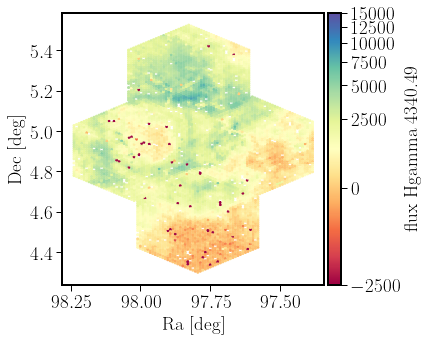

In [31]:
map_plot_DAP(tab_DAP,line='flux_Hgamma_4340.49',\
                 vmin=-500, vmax=15000, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')

flux_Hgamma_4340.49 -100 15000


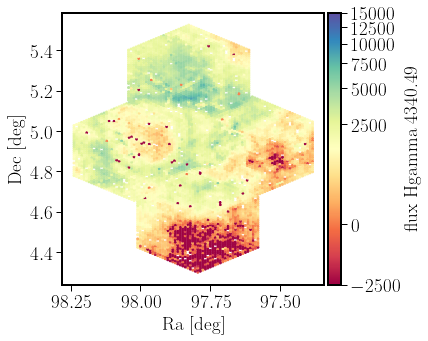

In [32]:
#flux_Hepsilon_3970.07'
#flux_Hdelta_4101.77',\
map_plot_DAP(tab_DAP,line='flux_Hgamma_4340.49',\
                 vmin=-100, vmax=15000, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')

flux_[OIII]_4363.21 -500 6000


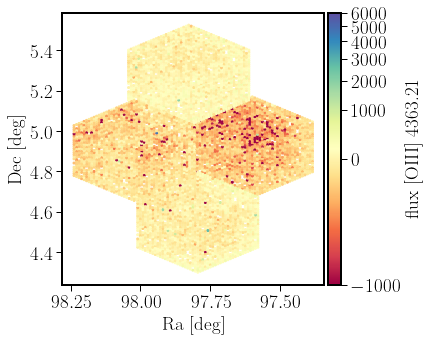

In [33]:
#flux_[OIII]_4363.21
map_plot_DAP(tab_DAP,line='flux_[OIII]_4363.21', \
                 vmin=-500, vmax=6000, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')

flux_[SIII]_6312.06 -2305.4233971574276 2430.607427722567


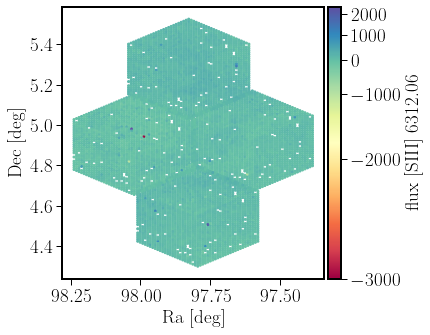

In [34]:
map_plot_DAP(tab_DAP,line='flux_[SIII]_6312.06', \
                 vmin=0, vmax=0, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')

flux_[NII]_5754.59 -3879645.195033283 3407823.803621313


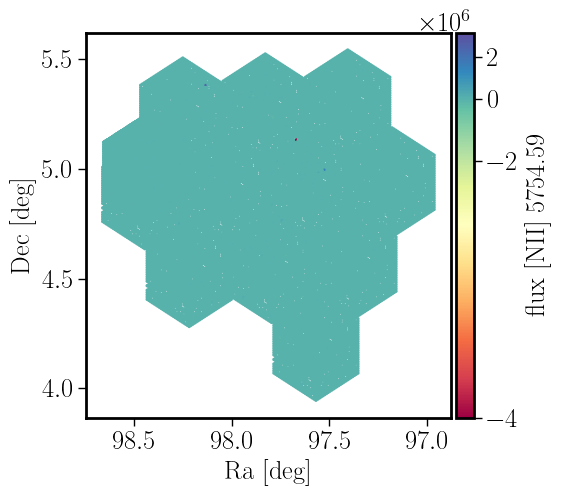

In [58]:
#[NII]_5754.59
map_plot_DAP(tab_DAP,line='flux_[NII]_5754.59', \
                 vmin=0, vmax=0, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')


flux_st 38346.8359375 491601600.0


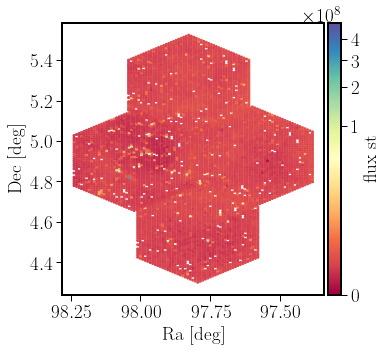

In [35]:
map_plot_DAP(tab_DAP,line='flux_st', \
                 vmin=0, vmax=0, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs',gamma=0.3,fig_type='pdf')

vel_Halpha_6562.85 -20 20


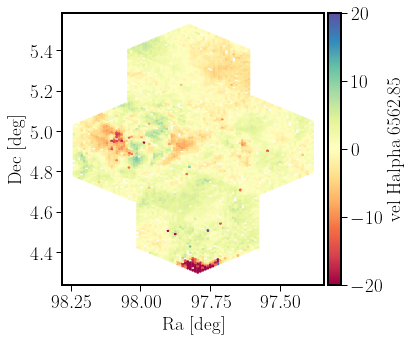

In [36]:
map_plot_DAP(tab_DAP,line='vel_Halpha_6562.85', \
                 vmin=-20, vmax=20, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs',gamma=1.0)


vel_st -20 20


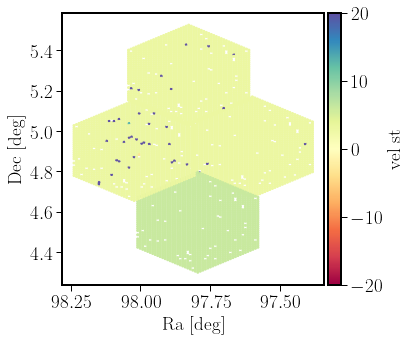

In [39]:
map_plot_DAP(tab_DAP,line='vel_st', \
                 vmin=-20, vmax=20, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs',gamma=1.0)

Teff 3152.5033564249266 9998.128156596242


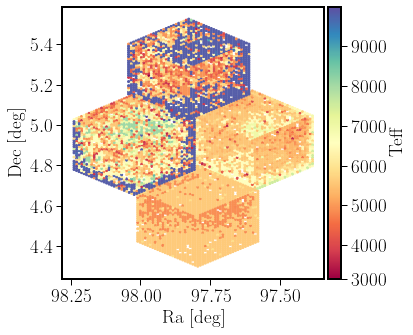

In [37]:
map_plot_DAP(tab_DAP,line='Teff', \
                 vmin=0, vmax=0, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs')


Fe -2.57243275642395 0.1981826275587082


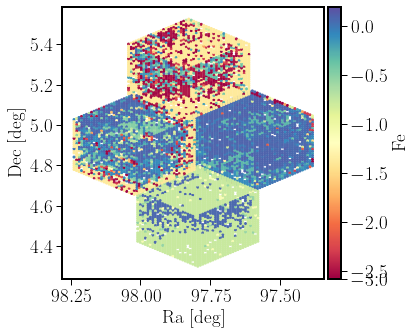

In [38]:
map_plot_DAP(tab_DAP,line='Fe', \
                 vmin=0, vmax=0, title=None, filename='junk',\
             cmap='Spectral', fsize=5, figs_dir='figs')
